Using the Brandwatch API to get twitter data - in this example I will be looking for tweets about 'Malibu' - the type of car, the barbie, the place and the delicious coconut rum drink! By the end of the tutorial I hope to be able to cluster the tweets into their catergories. 

In [1]:
from bwapi.bwproject import BWProject
from bwapi.bwresources import BWQueries
import mysecret
import datetime

In [2]:
project = BWProject(username=mysecret.username, 
                    password=mysecret.password,
                   project=mysecret.project, 
                   grant_type ="partner-password",
                   client_id ="partner-api-client")

10:30:31 INFO: Overwriting access token for sjones+bcr@brandwatch.com in tokens.txt
10:30:31 DEBUG: https://api.brandwatch.com/projects


In [3]:
queries = BWQueries(project)

10:30:42 DEBUG: https://api.brandwatch.com/projects/1998275431/queries
10:30:43 DEBUG: https://api.brandwatch.com/projects/1998275431/tags
10:30:44 DEBUG: https://api.brandwatch.com/projects/1998275431/categories


In [4]:
myqueries = queries.get()

10:30:51 DEBUG: https://api.brandwatch.com/projects/1998275431/queries/


In [12]:
today = (datetime.date.today() + datetime.timedelta(days=1)).isoformat() + "T05:00:00"
start = (datetime.date.today() - datetime.timedelta(days=3)).isoformat() + "T05:00:00"

In [13]:
filtered = queries.get_mentions(name = "malibu",
                                startDate = start, 
                                endDate = today)

10:33:59 DEBUG: https://api.brandwatch.com/projects/1998275431/data/mentions/fulltext?queryId=1999931431&startDate=2019-10-26T05%3A00%3A00&endDate=2019-10-30T05%3A00%3A00&pageSize=5000
10:33:59 INFO: Mentions page 1 of queries malibu retrieved
10:34:10 DEBUG: https://api.brandwatch.com/projects/1998275431/data/mentions/fulltext?queryId=1999931431&startDate=2019-10-26T05%3A00%3A00&endDate=2019-10-30T05%3A00%3A00&pageSize=5000&cursor=AQ%3DAA%3DAW4Sn_RY%3DMTk5OTkzMTQzMSFmZWJhMDllNzE5MjI3NjMwNWM3NzdjZGRjOGE5OTUxMQ
10:34:10 INFO: Mentions page 2 of queries malibu retrieved
10:34:20 DEBUG: https://api.brandwatch.com/projects/1998275431/data/mentions/fulltext?queryId=1999931431&startDate=2019-10-26T05%3A00%3A00&endDate=2019-10-30T05%3A00%3A00&pageSize=5000&cursor=AQ%3DAA%3DAW4Met1o%3DMTk5OTkzMTQzMSEwNjkyMzI2NjEyOWQ1MjIxY2ZiZjY2YTRiMDAwMzg4Nw
10:34:20 INFO: Mentions page 3 of queries malibu retrieved
10:34:20 INFO: 13407 mentions downloaded


In [40]:
import pandas as pd
rawdata = pd.DataFrame(data=filtered)

In [41]:
rawdata.head()

,resourceId,accountType,added,assignment,author,avatarUrl,categories,categoryDetails,checked,city,...,twitterRetweets,twitterRole,twitterVerified,updated,url,pageTypeName,impact,classifications,imageMd5s,logoImages
0,a4206c01c32efc572f4c3237a1c45ac3,None,2019-10-29T06:33:33.917+0000,None,waltchan,None,[],[],False,None,...,0,None,False,2019-10-29T06:33:33.917+0000,http://www.city-data.com/forum/automotive/3094...,Forums,37.1,NaN,NaN,NaN
1,a524dcafe68431bbdbbc7d0ecb012eac,None,2019-10-29T06:33:33.916+0000,None,waltchan,None,[],[],False,None,...,0,None,False,2019-10-29T06:33:33.916+0000,http://www.city-data.com/forum/automotive/3094...,Forums,37.1,NaN,NaN,NaN
2,41df926b374bb7ba9d3f96fef4720dfe,None,2019-10-29T05:17:49.629+0000,None,,None,[],[],False,None,...,0,None,False,2019-10-29T05:17:49.629+0000,http://ct.moreover.com/?a=40538032091&p=2p3&v=...,News,0.0,NaN,NaN,NaN
3,3d689b36eae04e1681d250f103f6bc10,None,2019-10-29T05:17:49.628+0000,None,Batdongsan.com.vn,None,[],[],False,None,...,0,None,False,2019-10-29T05:17:49.628+0000,http://ct.moreover.com/?a=40538032499&p=2p3&v=...,News,0.0,NaN,NaN,NaN
4,b99bb35f1b8299c7612a7c230a6a59d1,individual,2019-10-29T10:33:50.815+0000,None,SneakTweets,https://audiences.brandwatch.com/api/audiences...,[],[],False,None,...,0,None,False,2019-10-29T10:33:50.815+0000,http://twitter.com/SneakTweets/statuses/118912...,Twitter,49.4,NaN,NaN,NaN


In [42]:
rawtwitterdata = rawdata[rawdata['pageTypeName'].str.match('Twitter')]

In [43]:
rawtwitterdata

,resourceId,accountType,added,assignment,author,avatarUrl,categories,categoryDetails,checked,city,...,twitterRetweets,twitterRole,twitterVerified,updated,url,pageTypeName,impact,classifications,imageMd5s,logoImages
4,b99bb35f1b8299c7612a7c230a6a59d1,individual,2019-10-29T10:33:50.815+0000,None,SneakTweets,https://audiences.brandwatch.com/api/audiences...,[],[],False,None,...,0,None,False,2019-10-29T10:33:50.815+0000,http://twitter.com/SneakTweets/statuses/118912...,Twitter,49.4,NaN,NaN,NaN
8,da402a8314821d3c36069acb487d8dcd,individual,2019-10-29T10:25:25.561+0000,None,mileysbiewty,https://audiences.brandwatch.com/api/audiences...,[],[],False,Cairo,...,0,None,False,2019-10-29T10:33:01.133+0000,http://twitter.com/mileysbiewty/statuses/11891...,Twitter,13.0,"[{'classifierId': 'emotions', 'labelId': 'Joy'...",NaN,NaN
13,25553ae115c264d229980a95f4fa19d8,individual,2019-10-29T10:23:16.976+0000,None,mileyismyhenny,https://audiences.brandwatch.com/api/audiences...,[],[],False,None,...,0,None,False,2019-10-29T10:23:16.976+0000,http://twitter.com/mileyismyhenny/statuses/118...,Twitter,0.0,"[{'classifierId': 'emotions', 'labelId': 'Joy'...",NaN,NaN
15,4a6d4e0ab357db68954aa19372769f2d,individual,2019-10-29T10:22:47.592+0000,None,LouiseCohenCEO,https://audiences.brandwatch.com/api/audiences...,[],[],False,None,...,0,None,False,2019-10-29T10:22:47.592+0000,http://twitter.com/LouiseCohenCEO/statuses/118...,Twitter,0.0,NaN,NaN,NaN
16,d707e355e096efb81ae989fa7ad2c976,individual,2019-10-29T10:23:10.802+0000,None,Staceyymill,https://audiences.brandwatch.com/api/audiences...,[],[],False,Boston,...,0,None,False,2019-10-29T10:23:10.802+0000,http://twitter.com/Staceyymill/statuses/118912...,Twitter,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13397,7c8c2ab93e587e9c8aa4015b4a36c95c,individual,2019-10-26T05:05:01.561+0000,None,karsonnnnnn,https://audiences.brandwatch.com/api/audiences...,[],[],False,None,...,0,None,False,2019-10-26T06:09:38.325+0000,http://twitter.com/karsonnnnnn/statuses/118795...,Twitter,7.8,NaN,NaN,NaN
13398,a8abf0688a7e77edcd85336aaaf4d985,individual,2019-10-26T05:05:01.560+0000,None,heidinicoleeee,https://audiences.brandwatch.com/api/audiences...,[],[],False,Los Angeles,...,0,None,False,2019-10-26T05:16:31.080+0000,http://twitter.com/heidinicoleeee/statuses/118...,Twitter,20.0,"[{'classifierId': 'emotions', 'labelId': 'Sadn...",NaN,NaN
13401,a7de185de8bf7281eb71e3e1469e016f,individual,2019-10-26T05:04:24.667+0000,None,biswarupmukerji,https://audiences.brandwatch.com/api/audiences...,[],[],False,Kolkata,...,0,None,False,2019-10-26T05:04:24.667+0000,http://twitter.com/biswarupmukerji/statuses/11...,Twitter,0.0,NaN,NaN,NaN
13402,81859f50fe9a92550db6c7c6ec3f9208,individual,2019-10-26T05:03:50.395+0000,None,skylar_im,https://audiences.brandwatch.com/api/audiences...,[],[],False,None,...,0,None,False,2019-10-28T01:50:14.942+0000,http://twitter.com/skylar_im/statuses/11879577...,Twitter,21.5,"[{'classifierId': 'emotions', 'labelId': 'Disg...",NaN,NaN


In [44]:
df1 = rawtwitterdata[['resourceId', 'fullText']]
df1 = df1.drop_duplicates(['fullText'], keep='last')
df1

,resourceId,fullText
8,da402a8314821d3c36069acb487d8dcd,@alecscyrus @witnessinmalibu @MileyCyrus @Mile...
13,25553ae115c264d229980a95f4fa19d8,@alecscyrus @witnessinmalibu @MileyCyrus @Mile...
15,4a6d4e0ab357db68954aa19372769f2d,Vacation like Barbie in this dreamy AirBnB htt...
25,5d9973a95de5aeb327fd384fa80478bc,Barry 'Very Brady' Williams makes a sale in Ma...
32,32d6deef2abf94f6f044fa6e26b3cd4a,my mum got me malibu for my birthday i love her
...,...,...
13397,7c8c2ab93e587e9c8aa4015b4a36c95c,I chase my Malibu w white claw. Waddup.
13398,a8abf0688a7e77edcd85336aaaf4d985,i have a shoot tomorrow... but i don't want to...
13401,a7de185de8bf7281eb71e3e1469e016f,RT @MarilynDiary Marilyn Monroe at Paradise Co...
13402,81859f50fe9a92550db6c7c6ec3f9208,So I got this hydrating witch hazel and it’s c...


In [45]:
df2 = df1.sample(frac=0.1)

In [46]:
df2

,resourceId,fullText
8668,86422686a6f2a1a474ec055d6d786a43,2 Karat Diamond Solitare Lost Right After Marr...
5833,e5abb2ff018c4fe7f5aea9417202cd5d,@netflix when's malibu rescue s2???
8613,07358542630a8e1679ded87040d9e4ef,@EppsLazurus @sidetosde Kim didnt influence th...
12284,f4d0bcb91993aeec291640306d810c76,@astrahler41 So you’re ready to do this Malibu 😉
3254,0615f964ebf0e14e44adca6b7f2cc6d7,"The Getty Villa, A Art Video...Malibu, CA http..."
...,...,...
584,8d371529779523060e6cbfc50c6686ec,Great afternoon doing an EXPECT TO WIN session...
4025,944ed2d8305d2f7d6f43afcf0a882575,Idk who keeps breaking the hearts of of @thisi...
3154,a73d52bf88f8c34bc2b3a929fee71d17,.@KaiaGerber wore @Mango Structured Linen Jack...
2936,c2658dc1a4d1d35d0de92dc24c26513e,"RT @Ankeithvious Man you were drinking Malibu,..."


In [47]:
df3 = df2.fullText

In [48]:
df3

8668     2 Karat Diamond Solitare Lost Right After Marr...
5833                   @netflix when's malibu rescue s2???
8613     @EppsLazurus @sidetosde Kim didnt influence th...
12284     @astrahler41 So you’re ready to do this Malibu 😉
3254     The Getty Villa, A Art Video...Malibu, CA http...
                               ...                        
584      Great afternoon doing an EXPECT TO WIN session...
4025     Idk who keeps breaking the hearts of of @thisi...
3154     .@KaiaGerber wore @Mango Structured Linen Jack...
2936     RT @Ankeithvious Man you were drinking Malibu,...
9131                 I’ve decided I want to move to Malibu
Name: fullText, Length: 388, dtype: object

In [49]:
mentionslist = df3.values.tolist()

In [50]:
mentionslist

['2 Karat Diamond Solitare Lost Right After Marriage Proposal in the Waves at Malibu Beach, Found With Diligent Cross\xa0Griding https://t.co/VF6iY2CFLf https://t.co/5uzGq3HNlE',
 "@netflix when's malibu rescue s2???",
 '@EppsLazurus @sidetosde Kim didnt influence the new girls because kim wasnt even around like that when the new girls was coming up🤡🤡 nicki influenced cardi, kash, malibu, asian, doja...i mean the list goes on....',
 '@astrahler41 So you’re ready to do this Malibu 😉',
 'The Getty Villa, A Art Video...Malibu, CA https://t.co/SpodeTxrgn',
 'Mandatory and voluntary evacuation map continues to expand by the minute do no get caught up as very limited evacuation routes from #Palisades #Malibu #SantaMonica call #friendsfamily and alert #neighbors go to @LAFD #updates #GettyFire #SantaAnaWinds https://t.co/qjUujoEcdB',
 'RT @Itz_Vanilz Malibu & Coke is calling my name',
 'BREAKING: All Santa Monica-Malibu schools CLOSED today because of the #GettyFire Also, district office and 

Write this to a .txt file 

In [51]:
# open a (new) file to write
outF = open("data/test_docs.txt", "a")

In [52]:
outF = open("data/test_docs.txt", "a")
for line in mentionslist:
  # write line to output file
  outF.write(line)
  outF.write("\n")
outF.close()

Load the doc2vec trained model - doc2vec.bin has been trained on wikipedia data - available here:

https://ibm.ent.box.com/s/3f160t4xpuya9an935k84ig465gvymm2

In [53]:
model="doc2vec/doc2vec.bin"
test_docs="data/test_docs.txt"
output_file="data/test_vectors.txt"

In [54]:
#inference hyper-parameters - starting point, iterations over the corpus
start_alpha=0.01
infer_epoch=1000

In [55]:
# import all libraries 
import pandas as pd
import gensim.models as g
import codecs
import matplotlib.pyplot as plt

In [56]:
#load model
m = g.Doc2Vec.load(model)
test_docs = [ x.strip().split() for x in codecs.open(test_docs, "r", "utf-8").readlines() ]
print(test_docs)

[['2', 'Karat', 'Diamond', 'Solitare', 'Lost', 'Right', 'After', 'Marriage', 'Proposal', 'in', 'the', 'Waves', 'at', 'Malibu', 'Beach,', 'Found', 'With', 'Diligent', 'Cross', 'Griding', 'https://t.co/VF6iY2CFLf', 'https://t.co/5uzGq3HNlE'], ['@netflix', "when's", 'malibu', 'rescue', 's2???'], ['@EppsLazurus', '@sidetosde', 'Kim', 'didnt', 'influence', 'the', 'new', 'girls', 'because', 'kim', 'wasnt', 'even', 'around', 'like', 'that', 'when', 'the', 'new', 'girls', 'was', 'coming', 'up🤡🤡', 'nicki', 'influenced', 'cardi,', 'kash,', 'malibu,', 'asian,', 'doja...i', 'mean', 'the', 'list', 'goes', 'on....'], ['@astrahler41', 'So', 'you’re', 'ready', 'to', 'do', 'this', 'Malibu', '😉'], ['The', 'Getty', 'Villa,', 'A', 'Art', 'Video...Malibu,', 'CA', 'https://t.co/SpodeTxrgn'], ['Mandatory', 'and', 'voluntary', 'evacuation', 'map', 'continues', 'to', 'expand', 'by', 'the', 'minute', 'do', 'no', 'get', 'caught', 'up', 'as', 'very', 'limited', 'evacuation', 'routes', 'from', '#Palisades', '#Mali

In [57]:
#infer test vectors
output = open(output_file, "w")
for d in test_docs:
    output.write( " ".join([str(x) for x in m.infer_vector(d, alpha=start_alpha, steps=infer_epoch)]) + "\n" )
output.flush()
output.close()

In [58]:
df_vectors = pd.read_csv('data/test_vectors.txt', header = None)

In [59]:
df_vectors

,0
0,0.04362572 -0.055538666 0.07446497 0.032502916...
1,0.22993511 0.12671885 0.057097584 -0.25731117 ...
2,-0.25073478 -0.21528184 -0.24232624 0.03041765...
3,0.14414488 0.23847726 -0.02627768 -0.26801687 ...
4,-0.0016249999 -0.00083357835 -0.0011275389 -0....
...,...
383,0.39050043 -0.1419544 -0.058152482 -0.4580292 ...
384,-0.2127105 -0.015521426 0.07388257 0.39202788 ...
385,0.17227969 -0.14423166 0.020831075 0.23004372 ...
386,0.11453752 -0.07117472 -0.08440702 -0.18496707...


In [60]:
df_vectors_and_tweets = pd.DataFrame(mentionslist)

In [61]:
df_vectors_and_tweets

,0
0,2 Karat Diamond Solitare Lost Right After Marr...
1,@netflix when's malibu rescue s2???
2,@EppsLazurus @sidetosde Kim didnt influence th...
3,@astrahler41 So you’re ready to do this Malibu 😉
4,"The Getty Villa, A Art Video...Malibu, CA http..."
...,...
383,Great afternoon doing an EXPECT TO WIN session...
384,Idk who keeps breaking the hearts of of @thisi...
385,.@KaiaGerber wore @Mango Structured Linen Jack...
386,"RT @Ankeithvious Man you were drinking Malibu,..."


In [62]:
df_vectors_and_tweets = pd.concat([df_vectors_and_tweets, df_vectors], axis=1)

In [72]:
df_vectors_and_tweets

,0,0
0,2 Karat Diamond Solitare Lost Right After Marr...,0.04362572 -0.055538666 0.07446497 0.032502916...
1,@netflix when's malibu rescue s2???,0.22993511 0.12671885 0.057097584 -0.25731117 ...
2,@EppsLazurus @sidetosde Kim didnt influence th...,-0.25073478 -0.21528184 -0.24232624 0.03041765...
3,@astrahler41 So you’re ready to do this Malibu 😉,0.14414488 0.23847726 -0.02627768 -0.26801687 ...
4,"The Getty Villa, A Art Video...Malibu, CA http...",-0.0016249999 -0.00083357835 -0.0011275389 -0....
...,...,...
383,Great afternoon doing an EXPECT TO WIN session...,0.39050043 -0.1419544 -0.058152482 -0.4580292 ...
384,Idk who keeps breaking the hearts of of @thisi...,-0.2127105 -0.015521426 0.07388257 0.39202788 ...
385,.@KaiaGerber wore @Mango Structured Linen Jack...,0.17227969 -0.14423166 0.020831075 0.23004372 ...
386,"RT @Ankeithvious Man you were drinking Malibu,...",0.11453752 -0.07117472 -0.08440702 -0.18496707...


In [76]:
df_vectors_and_tweets.columns

Int64Index([0, 0], dtype='int64')

In [82]:
df_vectors_and_tweets.columns = ['text', 'vector']

In [83]:
df_vectors_and_tweets

,text,vector
0,2 Karat Diamond Solitare Lost Right After Marr...,0.04362572 -0.055538666 0.07446497 0.032502916...
1,@netflix when's malibu rescue s2???,0.22993511 0.12671885 0.057097584 -0.25731117 ...
2,@EppsLazurus @sidetosde Kim didnt influence th...,-0.25073478 -0.21528184 -0.24232624 0.03041765...
3,@astrahler41 So you’re ready to do this Malibu 😉,0.14414488 0.23847726 -0.02627768 -0.26801687 ...
4,"The Getty Villa, A Art Video...Malibu, CA http...",-0.0016249999 -0.00083357835 -0.0011275389 -0....
...,...,...
383,Great afternoon doing an EXPECT TO WIN session...,0.39050043 -0.1419544 -0.058152482 -0.4580292 ...
384,Idk who keeps breaking the hearts of of @thisi...,-0.2127105 -0.015521426 0.07388257 0.39202788 ...
385,.@KaiaGerber wore @Mango Structured Linen Jack...,0.17227969 -0.14423166 0.020831075 0.23004372 ...
386,"RT @Ankeithvious Man you were drinking Malibu,...",0.11453752 -0.07117472 -0.08440702 -0.18496707...


In [85]:
df_vectors_and_tweets_split = df_vectors_and_tweets['vector'].str.split(' ')

In [86]:
df_vectors_and_tweets_split

0      [0.04362572, -0.055538666, 0.07446497, 0.03250...
1      [0.22993511, 0.12671885, 0.057097584, -0.25731...
2      [-0.25073478, -0.21528184, -0.24232624, 0.0304...
3      [0.14414488, 0.23847726, -0.02627768, -0.26801...
4      [-0.0016249999, -0.00083357835, -0.0011275389,...
                             ...                        
383    [0.39050043, -0.1419544, -0.058152482, -0.4580...
384    [-0.2127105, -0.015521426, 0.07388257, 0.39202...
385    [0.17227969, -0.14423166, 0.020831075, 0.23004...
386    [0.11453752, -0.07117472, -0.08440702, -0.1849...
387    [0.25391075, 0.09400915, 0.01043599, -0.079611...
Name: vector, Length: 388, dtype: object

In [87]:
df_vectors_and_tweets_split_2 = pd.DataFrame(df_vectors_and_tweets_split)

In [88]:
df_vectors_and_tweets_split_2

,vector
0,"[0.04362572, -0.055538666, 0.07446497, 0.03250..."
1,"[0.22993511, 0.12671885, 0.057097584, -0.25731..."
2,"[-0.25073478, -0.21528184, -0.24232624, 0.0304..."
3,"[0.14414488, 0.23847726, -0.02627768, -0.26801..."
4,"[-0.0016249999, -0.00083357835, -0.0011275389,..."
...,...
383,"[0.39050043, -0.1419544, -0.058152482, -0.4580..."
384,"[-0.2127105, -0.015521426, 0.07388257, 0.39202..."
385,"[0.17227969, -0.14423166, 0.020831075, 0.23004..."
386,"[0.11453752, -0.07117472, -0.08440702, -0.1849..."


Split the vectors into one per column - 300 columns 

In [94]:
from sklearn.manifold import TSNE

In [95]:
vectors_df = pd.DataFrame(df_vectors_and_tweets_split_2.vector.tolist(), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', 
                                                                     '10', '11', '12', '13', '14', '15', '16', '17', 
                                                                     '18', '19', '20', '21', '22', '23', '24', '25', 
                                                                     '26', '27', '28', '29', '30', '31', '32', '33',
                                                                     '34', '35','36','37','38','39','40','41','42',
                                                                     '43','44','45','46','47','48','49','50','51',
                                                                     '52','53','54','55','56','57','58','59','60',
                                                                     '61','62','63','64','65','66','67','68','69',
                                                                     '70','71',
                                                                '72','73','74','75','76','77','78','79','80','81',
                                                                     '82','83','84','85','86','87','88','89','90',
                                                                     '91','92','93','94','95','96','97','98','99',
                                                                     '100',
                                                                     '101', '102', '103', '104', '105', '106', '107', 
                                                                     '108', '109', '110', '111', '112', '113', '114', 
                                                                     '115', '116', '117','118','119','120','121',
                                                                     '122','123','124','125','126','127','128','129',
                                                                     '130','131','132','133','134','135','136','137',
                                                                     '138',
                                                                     '139','140','141','142','143','144','145','146',
                                                                     '147','148','149','150','151','152','153','154',
                                                                     '155','156','157','158','159','160','161','162',
                                                                     '163','164','165','166','167','168','169','170',
                                                                     '171','172','173','174','175','176','177','178',
                                                                     '179','180','181','182','183','184','185','186',
                                                                     '187','188','189','190','191','192','193','194',
                                                                     '195','196','197','198','199', 
                                                                     '200', '201', '202', '203', '204', '205', '206',
                                                                     '207', '208', '209', '210', '211', '212', '213',
                                                                     '214', '215', '216', '217','218','219','220',
                                                                     '221',
                                                                    '222','223','224','225','226','227','228','229',
                                                                     '230','231','232','233','234','235','236',
                                                                     '237','238','239','240','241','242','243','244',
                                                                     '245','246','247','248','249','250',
                                                                     '251','252','253','254','255','256','257','258',
                                                                     '259','260','261','262','263','264','265','266',
                                                                     '267','268','269',
                                                                     '270','271','272','273','274','275','276','277',
                                                                     '278','279','280','281','282','283','284','285',
                                                                     '286','287','288',
                                                                     '289','290','291','292','293','294','295','296',
                                                                     '297','298','299','300'])

In [96]:
vectors_df

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,0.04362572,-0.055538666,0.07446497,0.032502916,-0.050279334,-0.03934862,0.042089287,-0.08598694,0.007625244,-0.029645566,...,-0.07236356,0.1160858,-0.10518914,-0.15277962,-0.07726703,-0.14419706,-0.18611355,0.14121568,-0.080327734,-0.19334051
1,0.22993511,0.12671885,0.057097584,-0.25731117,0.23166208,0.14886868,0.24577482,-0.27901667,0.062085003,0.20470245,...,-0.21175255,0.013534082,-0.19756047,-0.10271313,-0.19281825,-0.21470547,0.081739545,0.21028368,-0.030156422,-0.1735849
2,-0.25073478,-0.21528184,-0.24232624,0.030417651,0.3947445,-0.3870911,-0.1318943,-0.25630063,-0.04868536,-0.038232647,...,0.14437425,0.6707324,-0.2908252,0.3457143,-0.25613034,-0.4197353,-0.2401751,-0.2812699,-0.019534068,0.13588557
3,0.14414488,0.23847726,-0.02627768,-0.26801687,-0.18546787,0.03229226,0.36867955,0.05231401,-0.054744147,-0.042333826,...,-0.01497432,0.24978666,-0.16404079,-0.18552215,0.20782232,-0.16761467,-0.11586237,0.11677078,-0.112594746,0.14029555
4,-0.0016249999,-0.00083357835,-0.0011275389,-0.0011605641,-0.0008735591,0.00074437476,-0.0010721164,0.000771931,-0.00070184685,0.0013466802,...,0.00034144567,0.00011164714,0.0011259888,0.00021615138,-3.966869e-05,-0.00014059863,0.0016202143,0.0003047889,0.0010885377,0.0011853765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.39050043,-0.1419544,-0.058152482,-0.4580292,-0.14707479,-0.004180722,0.19993624,-0.18603219,-0.30993593,-0.3117973,...,-0.36897236,0.6889198,-0.15456231,-0.18230768,0.07890289,-0.2312657,-0.42692602,-0.096993834,-0.14618766,-0.3869668
384,-0.2127105,-0.015521426,0.07388257,0.39202788,-0.17054547,-0.26388547,0.196367,-0.5844403,0.147724,-0.24698521,...,-0.022518184,0.6553206,-0.21412048,-0.29629144,-0.28225636,-0.20296414,-0.6191935,0.26475433,-0.08268507,-0.27856684
385,0.17227969,-0.14423166,0.020831075,0.23004372,0.1056832,-0.04424677,0.28963584,-0.15292872,-0.063640215,0.18250163,...,-0.208672,-0.0005318616,-0.063432656,-0.054266732,0.049494408,-0.30953038,-0.05616423,0.09631238,-0.011353622,0.11380701
386,0.11453752,-0.07117472,-0.08440702,-0.18496707,-0.093339875,-0.2420969,0.64627737,0.116155416,0.16503367,-0.09114446,...,-0.019524386,0.6381046,0.028865054,0.03043422,0.33370566,-0.39454767,0.09553712,0.41820386,-0.014977875,0.25509432


In [98]:
# perform t-SNE: Vectors
RS = 123

from sklearn.manifold import TSNE


vectors_tsne = TSNE(random_state=RS).fit_transform(vectors_df)



In [99]:
vectors_tsne

array([[ 9.3969786e-01,  2.1878147e+00],
       [-1.1239897e+01, -7.9069228e+00],
       [-2.7192988e+00, -9.2102032e+00],
       [-3.0438151e+00, -3.2068608e+00],
       [ 6.4367801e-01,  4.1210113e+00],
       [-6.4016705e+00,  1.3165894e-01],
       [ 4.1950631e+00, -3.4243443e+00],
       [ 1.4646056e+00,  8.2943144e+00],
       [ 7.4859095e+00, -1.0881838e+01],
       [ 3.9695099e-02, -9.6135378e-01],
       [ 9.0574342e-01,  7.1007490e-01],
       [-7.8451484e-01, -5.1226997e+00],
       [-1.0085668e+01, -5.9814224e+00],
       [ 6.6911000e-01,  3.5443132e+00],
       [-8.8323917e+00, -1.2065220e+00],
       [-1.9968497e+00, -4.7951889e+00],
       [-4.7121425e+00,  5.7172685e+00],
       [-8.8147535e+00,  1.0583686e+00],
       [-2.2262688e+00,  5.4055339e-01],
       [-3.7807598e+00, -1.2213852e+01],
       [-6.0392408e+00, -1.0880971e+01],
       [-2.4379085e-01, -5.0510931e+00],
       [ 3.2130936e-01, -8.0200708e-01],
       [-6.5235000e+00, -2.6884265e+00],
       [-5.01981

In [100]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

In [110]:
graph_vectors = pd.DataFrame(vectors_tsne)

In [111]:
graph_vectors

,0,1
0,0.939698,2.187815
1,-11.239897,-7.906923
2,-2.719299,-9.210203
3,-3.043815,-3.206861
4,0.643678,4.121011
...,...,...
383,-11.442832,-2.988715
384,-7.934594,-2.902309
385,1.985165,0.708697
386,1.060236,-7.767632


In [112]:
graph_vectors.columns = ['x', 'y']

In [113]:
graph_vectors

,x,y
0,0.939698,2.187815
1,-11.239897,-7.906923
2,-2.719299,-9.210203
3,-3.043815,-3.206861
4,0.643678,4.121011
...,...,...
383,-11.442832,-2.988715
384,-7.934594,-2.902309
385,1.985165,0.708697
386,1.060236,-7.767632


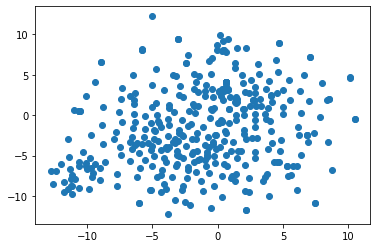

In [114]:
plt.scatter(graph_vectors.x, graph_vectors.y)